## Deep Learning: Assignment 1: Perceptrons

In [75]:
# Enter your own information here!
student_name = 'Janne Arkko'
student_id = 'AB3817'

## Assignment 1-1
### Topic: Happiness, Classifier: Perceptron (3 p)

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.
Note! the file is UTF-16 encoded, so you need to set encoding when reading.

In [76]:

# Note! Implementation code of preprocessing is already written in this assignment.
import pandas as pd

df = pd.read_csv('./data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
Use random seed `9001`.

In [77]:
# TODO: Type your implementation in this cell.
from sklearn.model_selection import train_test_split

columns_to_drop = ['happy']
X = df.drop(columns=columns_to_drop)
y = df['happy']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9001, shuffle=True)

In [78]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

In [79]:
# TODO: Type your implementation in this cell.
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools

pc = Perceptron().fit(X_train, y_train)
y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [80]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.4791666666666667


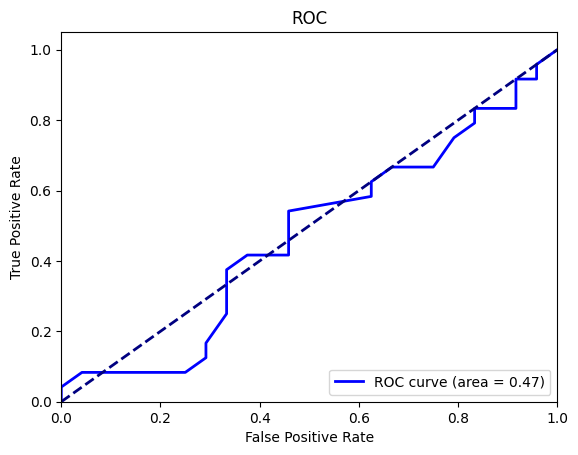

In [81]:
# TODO: Type your implementation in this cell.
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

# Plot
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# TODO: Reflection - thoughts of ROC curve and accuracy.
reflection = "Accuracy is quite bad. Can't say that the model is accurate at all. With AUC score of 0.47, the model made more mistakes\nthan correct predictions. It predicts Actual 0 better than Actual 1, only 2 predicted 1 was actual 1."

Classification report:
               precision    recall  f1-score   support

           0       0.49      0.88      0.63        24
           1       0.40      0.08      0.14        24

    accuracy                           0.48        48
   macro avg       0.44      0.48      0.38        48
weighted avg       0.44      0.48      0.38        48

Confusion matrix:
 [[21  3]
 [22  2]]
auc: 0.47048611111111116
Reflection: Accuracy is quite bad. Can't say that the model is accurate at all. With AUC score of 0.47, the model made more mistakes
than correct predictions. It predicts Actual 0 better than Actual 1, only 2 predicted 1 was actual 1.


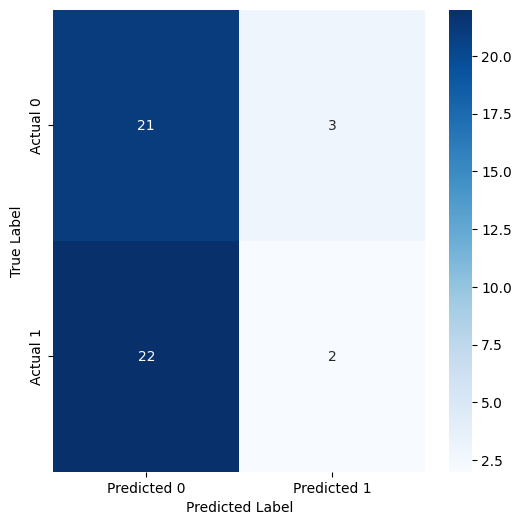

In [82]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Reflection: {reflection}')

# TODO: Visualize results also

# plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Assignment 1-2
### Topic: Newsgroup messages with Perceptron (3 p)

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [83]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                              remove=('headers', 'footers', 'quotes'))

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data to numerical with the fit_transform() method
vectors_train = Vectorizer.fit_transform(ng_train.data)
# TODO: Transform the test data using a different method
vectors_test = Vectorizer.transform(ng_test.data)


1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [84]:
# TODO: Type your implementation in this cell.

pc = Perceptron(random_state=12501)
pc.fit(vectors_train, ng_train.target)
y_pred = pc.predict(vectors_test)
y_score = pc.decision_function(vectors_test)

cr = classification_report(ng_test.target, y_pred)
cm = confusion_matrix(ng_test.target, y_pred)


In [85]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(vectors_test, ng_test.target)}')
print(cm) # compare the actual values with the predictions
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix.

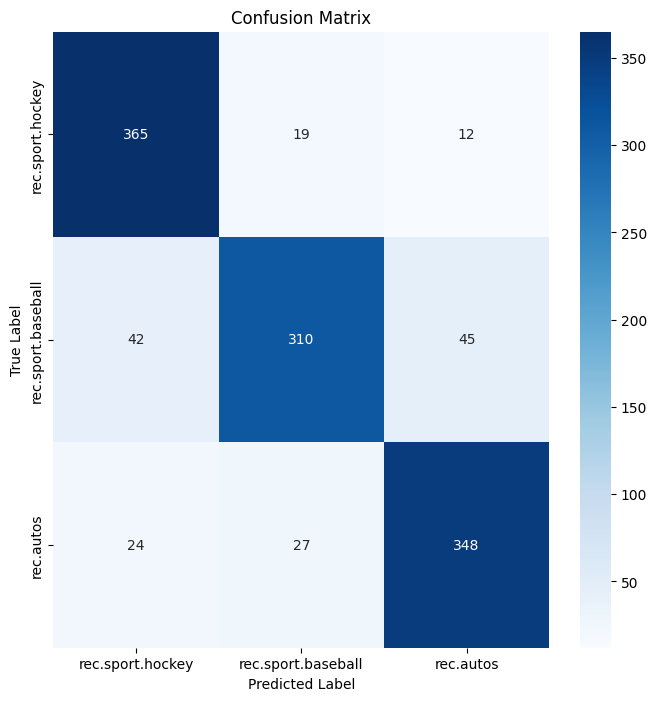

In [86]:
# TODO: plot the confusion matrix

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories,
            yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Assignment 1-3) (2 p) Another newgroup classifier

Do the same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [87]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train_2 = fetch_20newsgroups(subset='train', categories=categories_2,
                               remove=('headers', 'footers', 'quotes'))
ng_test_2 = fetch_20newsgroups(subset='test', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))

Vectorizer_2 = TfidfVectorizer()

# TODO: Transform the training data with the fit_transform() method
vectors_train_2 = Vectorizer_2.fit_transform(ng_train_2.data)
# TODO: Transform the test data using a different method
vectors_test_2 = Vectorizer_2.transform(ng_test_2.data)

In [88]:
pc_2 = Perceptron(random_state=12501)
pc_2.fit(vectors_train_2, ng_train_2.target)
y_pred_2 = pc_2.predict(vectors_test_2)
y_score_2 = pc_2.decision_function(vectors_test_2)

cr_2 = classification_report(ng_test_2.target, y_pred_2)
cm_2 = confusion_matrix(ng_test_2.target, y_pred_2)

In [89]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the task.

print(f"Predict: {y_pred_2} and score: {y_score_2}")
print(f'Perceptron average test accuracy: {pc_2.score(vectors_test_2, ng_test_2.target)}')
print(confusion_matrix(ng_test_2.target, y_pred_2))
print(classification_report(ng_test_2.target, y_pred_2))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.79084953 -0.54862678 -0.67818069]
 [-0.24036164 -0.5191811   0.02529202]
 [-0.27250296  0.18487685 -0.02065824]
 ...
 [ 0.38867009 -0.19169666 -0.59294443]
 [-0.68236023  0.88524358 -0.85308886]
 [-0.33076315  0.23788087 -0.61880495]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



Let's draw a picture of the confusion matrix with `categories_2` data.

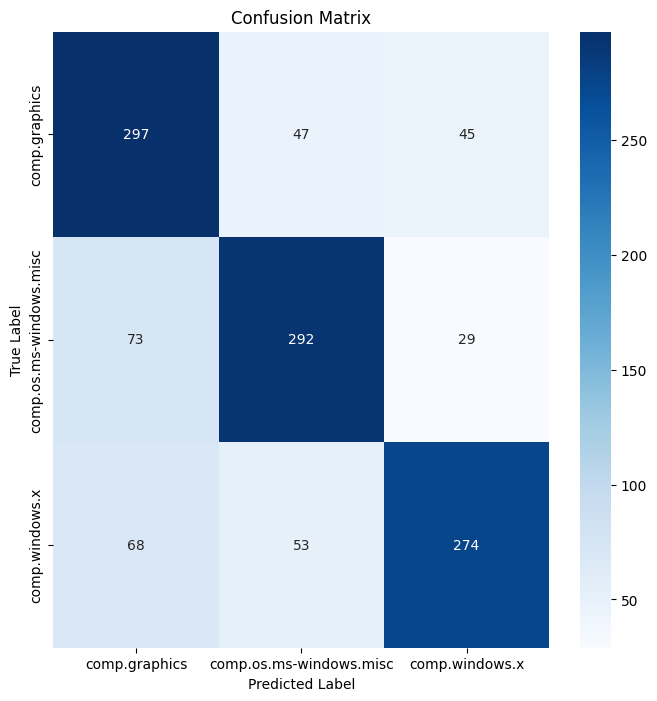

In [90]:
# TODO: Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories_2,
            yticklabels=categories_2)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

To start reflecting, let's print some scores:

Perceptron average test accuracy with category 1: 0.86
Perceptron average test accuracy with category 2: 0.73

Feature weights for category 1:



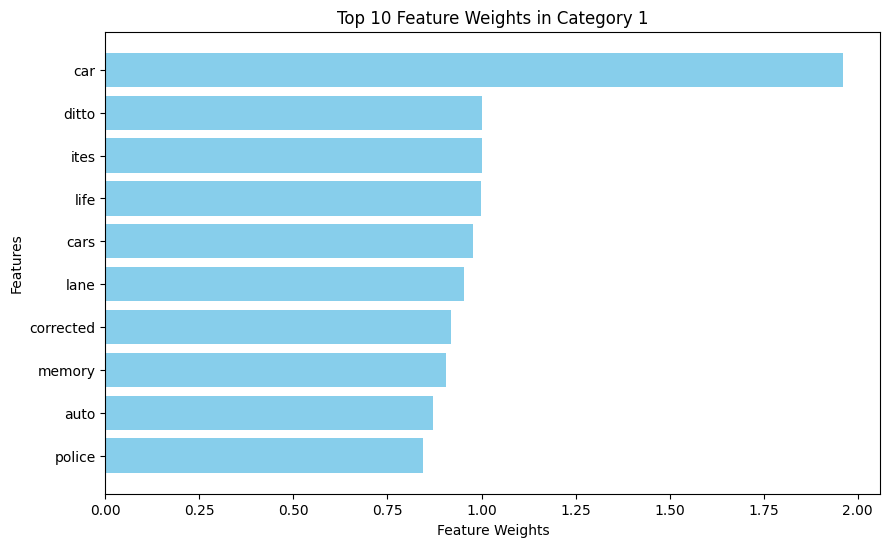


Feature weights for category 2:



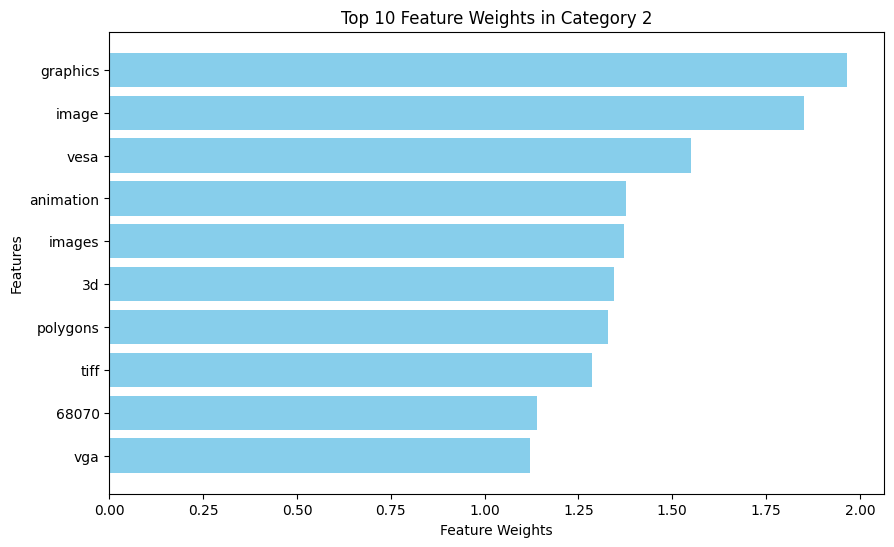

In [102]:
# REFLECTION

print("To start reflecting, let's print some scores:\n")
print(f'Perceptron average test accuracy with category 1: {pc.score(vectors_test, ng_test.target):.2f}')
print(f'Perceptron average test accuracy with category 2: {pc_2.score(vectors_test_2, ng_test_2.target):.2f}')
print("")
print("Feature weights for category 1:\n")
feature_names = Vectorizer.get_feature_names_out()
weights = pc.coef_[0]
feature_weights = zip(feature_names, weights)
sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

N = 10
top_features, top_weights = zip(*sorted_features[:N])

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_weights, color='skyblue')
plt.xlabel('Feature Weights')
plt.ylabel('Features')
plt.title('Top 10 Feature Weights in Category 1')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

print("")
print("Feature weights for category 2:\n")
feature_names_2 = Vectorizer_2.get_feature_names_out()
weights_2 = pc_2.coef_[0]
feature_weights_2 = zip(feature_names_2, weights_2)
sorted_features_2 = sorted(feature_weights_2, key=lambda x: x[1], reverse=True)

top_features_2, top_weights_2 = zip(*sorted_features_2[:N])

plt.figure(figsize=(10, 6))
plt.barh(top_features_2, top_weights_2, color='skyblue')
plt.xlabel('Feature Weights')
plt.ylabel('Features')
plt.title('Top 10 Feature Weights in Category 2')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()



# ANALYSIS

As we can see above, the perceptron model was much more accurate with category 1 data than with category 2 data. But, that doesn't mean that the model did better with the category 1 data as we can see from the feature weights. Category 1 data has one feature above all, which is 'car' that is weighted almost to 2.0 when all other features are 1 or nearly 1 or below. This means that there might be overfitting involved with the category 1 predictions because of the weight of one feature.

The category 2 feature weights tell a little different story. There are two features that are weighted quite similarly: 'graphics' and 'image'. Also 'vesa' has significant weight compared to the others. This means that the model is making its predictions based on atleast 3 significant features instead of 1 with the category 1 data. Also, just to note that all the features in category 2 data are weighted higher than the category 1 data excluding 'car' feature.

Therefore, I'm analysing the results in a way that the model's general performance is better with the category 2 data. The distribution of feature weights with category 2 data is so significant that it does make the model generally better than with category 1 data. Of course, further validation of performance would be needed, but based on the metrics provided, this is my conclusion.